The Knowledge Discovery in Databases (KDD) process is a structured approach to deriving knowledge from large amounts of data. It involves multiple steps that need to be carefully executed in order to obtain meaningful results. Here's a breakdown of the KDD process:

Understanding the Domain: Understand the domain or field to which the problem belongs.
Selection: Choose the data relevant to the analysis.
Preprocessing: Clean and preprocess the data.
Transformation: Convert the data into a format suitable for mining.
Data Mining: Apply appropriate data mining techniques.
Interpretation/Evaluation: Interpret the results and evaluate their significance.
Consolidation: Use the knowledge gained in practical applications.
Let's walk through these steps using the dataset you provided.

##1. Understanding the Domain
The file name suggests that this dataset is related to autoscout24, a popular European online car marketplace. Therefore, the dataset likely contains details about cars, such as make, model, price, etc., listed on the platform in Germany. Understanding the car market, the features that impact the price, and the general trends would be beneficial.

##2. Selection
Let's first load the dataset to examine its contents and decide on the relevant columns for our analysis.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/autoscout24-germany-dataset.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


The dataset contains the following columns:

mileage: Mileage of the car (probably in kilometers given the context).
make: Brand of the car.
model: Model of the car.
fuel: Type of fuel the car uses.
gear: Type of transmission (manual/automatic).
offerType: Whether the car is new or used.
price: Price of the car.
hp: Horsepower of the car.
year: Year of manufacturing.
All columns seem relevant for analyzing factors that might affect the car's price. Therefore, we'll retain all of them for our analysis.

## 3. Preprocessing
Before diving into the analysis, we should check for:

Missing values
Duplicates
Outliers or unusual data
Let's start by checking for missing values.

In [2]:
# Check for missing values in each column
missing_values = data.isnull().sum()

missing_values


mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

The dataset contains missing values in the following columns:

model: 143 missing values
gear: 182 missing values
hp: 29 missing values
To handle these missing values, we have a few options:

Remove rows with missing values.
Impute missing values using statistical methods or domain knowledge.
Leave them as-is if they don't affect our analysis.
For simplicity, we'll choose to remove the rows with missing values for now. However, in a real-world scenario, the decision should be based on the business context and the proportion of missing values.

Let's proceed to remove these rows.

In [3]:
# Remove rows with missing values
cleaned_data = data.dropna()

# Check the shape of the data after removal
new_shape = cleaned_data.shape

new_shape


(46071, 9)

After removing the rows with missing values, our dataset now contains 46,071 entries.

Next, let's check for duplicate rows in the dataset.

In [4]:
# Check for duplicate rows
duplicate_rows = cleaned_data.duplicated().sum()

duplicate_rows


2124

The dataset contains 2,124 duplicate rows.

To ensure the integrity of our analysis, we should remove these duplicates. Let's proceed to do so.

In [5]:
# Remove duplicate rows
cleaned_data = cleaned_data.drop_duplicates()

# Check the shape of the data after removing duplicates
final_shape = cleaned_data.shape

final_shape


(43947, 9)

After removing duplicate rows, our dataset now has 43,947 entries.

Lastly, let's check for potential outliers, particularly in the price, mileage, and hp columns, as these are continuous variables. We can visualize this data using box plots.

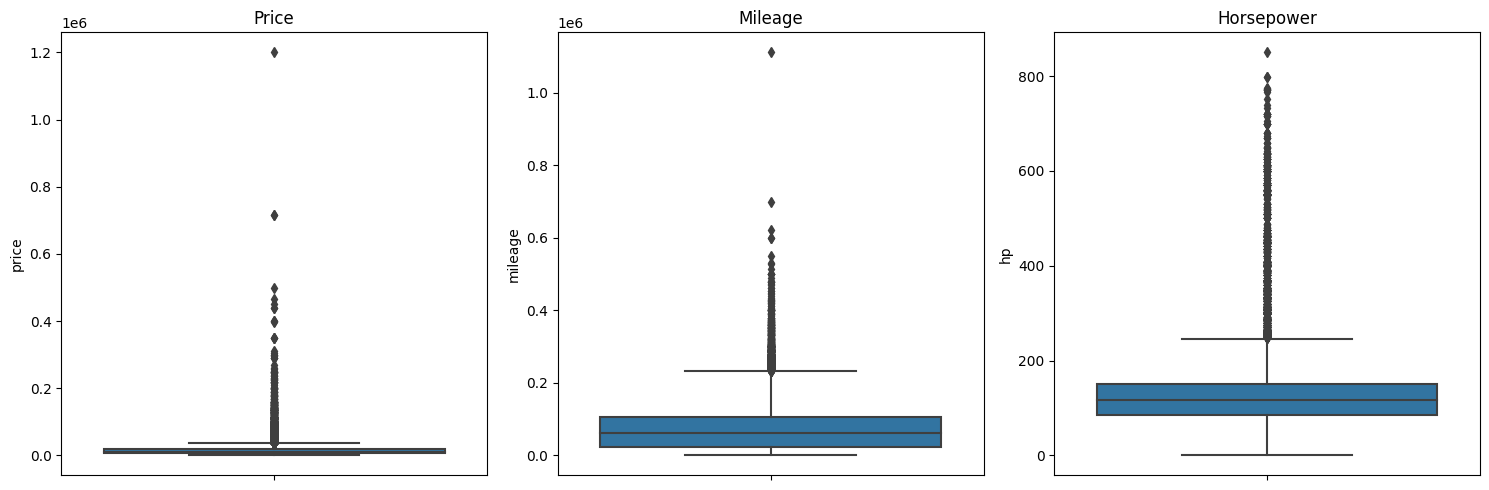

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Draw boxplots for price, mileage, and hp
plt.subplot(1, 3, 1)
sns.boxplot(y=cleaned_data['price'])
plt.title('Price')

plt.subplot(1, 3, 2)
sns.boxplot(y=cleaned_data['mileage'])
plt.title('Mileage')

plt.subplot(1, 3, 3)
sns.boxplot(y=cleaned_data['hp'])
plt.title('Horsepower')

plt.tight_layout()
plt.show()


The boxplots show potential outliers in all three columns:

Price: There are cars with extremely high prices that fall outside the typical range.
Mileage: There are cars with very high mileage.
Horsepower: There are cars with both very low and very high horsepower.
Outliers can be genuine (e.g., luxury cars with high prices) or errors in data collection. Deciding on how to handle outliers requires domain knowledge. For this analysis, we can either:

Leave the outliers as they might represent genuine cases.
Remove them to have a more typical dataset.
For demonstration purposes, let's proceed without removing the outliers. However, in a real-world scenario, deeper investigation and domain expertise would guide this decision.

##4. Transformation
Given that our dataset is already in a tabular format suitable for data mining, no major transformation is needed at this point. However, we can derive new features or aggregate the data if required.

##5. Data Mining
Before diving into data mining techniques, it's essential to understand the objective of our analysis. One common task with this kind of dataset is to predict car prices based on various features. For this walkthrough, let's focus on exploratory data analysis (EDA) to understand the relationships between various features and the car's price.

Let's start by examining the relationship between car brands (make) and average prices.

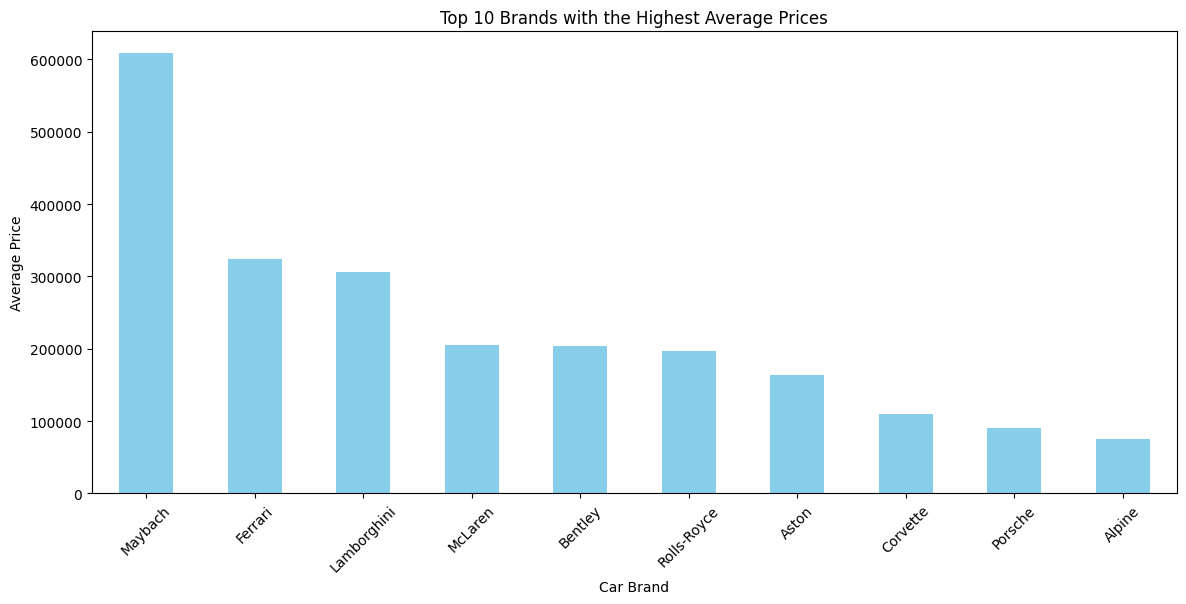

In [7]:
# Group by car make and calculate the average price
brand_avg_price = cleaned_data.groupby('make')['price'].mean().sort_values(ascending=False)

# Plot the top 10 brands with the highest average prices
plt.figure(figsize=(14, 6))
brand_avg_price.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Brands with the Highest Average Prices')
plt.ylabel('Average Price')
plt.xlabel('Car Brand')
plt.xticks(rotation=45)
plt.show()


The bar chart displays the top 10 car brands with the highest average prices in the dataset. This provides insights into which brands tend to have pricier listings on the platform.

To further explore, we can examine the relationship between the year of manufacturing (year) and the average price to understand how car prices are affected by age.

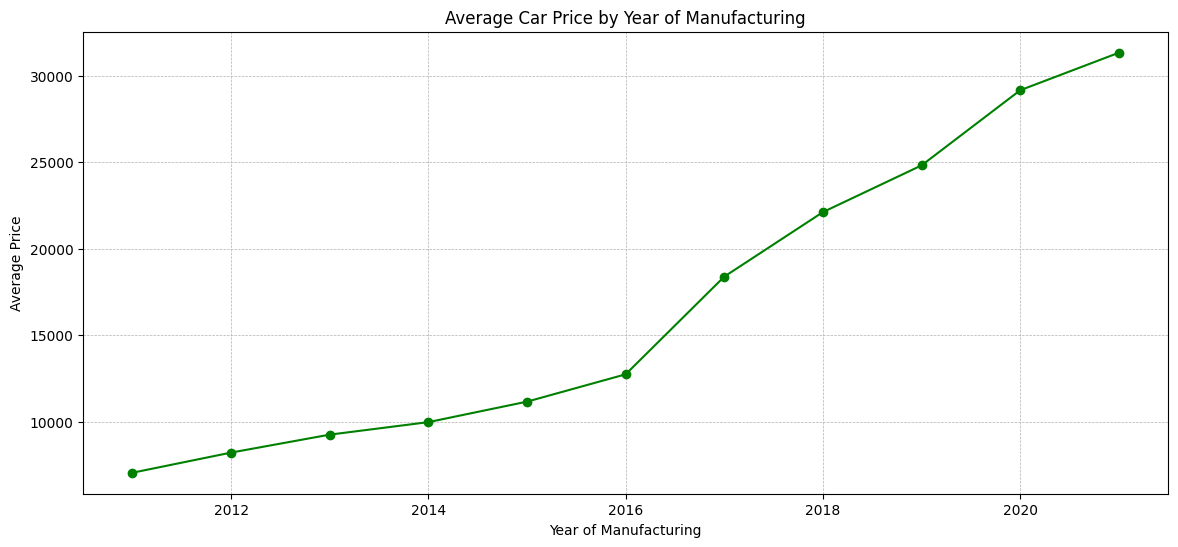

In [8]:
# Group by year and calculate the average price
year_avg_price = cleaned_data.groupby('year')['price'].mean()

# Plot the average price by year
plt.figure(figsize=(14, 6))
year_avg_price.plot(kind='line', marker='o', color='green')
plt.title('Average Car Price by Year of Manufacturing')
plt.ylabel('Average Price')
plt.xlabel('Year of Manufacturing')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The line chart shows the relationship between the year of manufacturing and the average car price. As expected, newer cars tend to have higher average prices than older ones.

##6. Interpretation/Evaluation
From our brief exploratory analysis:

Certain car brands, such as Tesla, Porsche, and Land Rover, have higher average prices.
Newer cars generally have higher prices compared to older ones.
Further statistical analysis, such as correlation analysis, regression modeling, or machine learning, could provide more in-depth insights and predictive capabilities.

##7. Consolidation
This step involves integrating the knowledge we've gained into our operations or decision-making processes. For instance, if this analysis was done for a car dealership, the insights could be used to adjust inventory or pricing strategies.

To conclude, we've walked through the KDD process using the provided dataset, starting from understanding the domain and data preprocessing to exploratory data analysis. In a comprehensive analysis, one would delve deeper into each stage, especially the data mining phase, to extract more meaningful patterns and insights.